# MUSIC DATA ANALYSIS

This notebook provides an analysis of a music dataset including:
1. Data Preprocessing
2. Descriptive Statistical Analysis (Global and by Decade)
3. Temporal Pattern Analysis
4. Outlier Detection
5. Clustering Analysis (K-Means and Hierarchical)
6. Classification for Popularity Prediction
7. Visualizations

**Dataset Attributes:**
- Artist Name, Track Name, Popularity
- Audio Features: Danceability, Energy, Key, Loudness, Mode, Speechiness, Acousticness, Liveness, Valence
- Technical: Tempo, Duration, Time Signature, Release Year

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

# Scikit-learn imports
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# Configuration
plt.style.use('default')
warnings.filterwarnings('ignore')
np.random.seed(42)


All libraries imported successfully!


## 1. Data Loading and Initial Exploration

In [ ]:
# Load dataset
df = pd.read_csv('music-data.csv')

print(f"Dataset shape: {df.shape}")
print(f"Year range: {df['release_year'].min()} - {df['release_year'].max()}")
print(f"Popularity range: {df['popularity'].min()} - {df['popularity'].max()}")

Dataset loaded successfully!
Dataset shape: (795, 16)
Year range: 1927 - 2023
Popularity range: 1.0 - 94.0


In [65]:
# Initial data exploration
print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         795 non-null    object 
 1   Track Name          795 non-null    object 
 2   popularity          795 non-null    float64
 3   danceability        795 non-null    float64
 4   energy              795 non-null    float64
 5   key                 795 non-null    float64
 6   loudness            795 non-null    float64
 7   mode                795 non-null    int64  
 8   speechiness         795 non-null    float64
 9   acousticness        795 non-null    float64
 10  liveness            795 non-null    float64
 11  valence             795 non-null    float64
 12  tempo               795 non-null    float64
 13  duration_in min/ms  795 non-null    float64
 14  time_signature      795 non-null    int64  
 15  release_year        795 non-null    

In [66]:
print("Basic statistics:")
df_stats = df.describe()
print(df_stats)

Basic statistics:
       popularity  danceability      energy         key    loudness  \
count  795.000000    795.000000  795.000000  795.000000  795.000000   
mean    46.104403      0.535125    0.679273    6.031447   -7.491436   
std     16.686558      0.162696    0.230655    3.268469    3.651391   
min      1.000000      0.076100    0.029100    1.000000  -25.040000   
25%     35.000000      0.431500    0.539000    3.000000   -9.191500   
50%     45.000000      0.534000    0.713000    7.000000   -6.691000   
75%     58.000000      0.642000    0.876000    9.000000   -4.930500   
max     94.000000      0.957000    1.000000   11.000000    0.878000   

             mode  speechiness  acousticness    liveness     valence  \
count  795.000000    795.00000    795.000000  795.000000  795.000000   
mean     0.636478      0.07643      0.216827    0.203362    0.494001   
std      0.481316      0.07326      0.300456    0.163909    0.234764   
min      0.000000      0.02300      0.000001    0.0171

## 2. Data Preprocessing

In [ ]:
# Check for missing values
print("Missing Values Analysis:")
missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("No missing values found")
else:
    print(f"Total missing values: {missing_values.sum()}")
    for column in df.columns:
        if missing_values[column] > 0:
            print(f"{column}: {missing_values[column]}")

Missing Values Analysis:
No missing values found!


In [ ]:
# Handle missing values (if any)
# For numerical columns, fill with median
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled {col} with median: {median_val}")

# For categorical columns, fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled {col} with mode: {mode_val}")

print("Missing value handling completed")

Missing value handling completed!


In [ ]:
# Data type conversions and feature engineering
print("Data Type Conversions")

# Convert duration from milliseconds to minutes
df['duration_min'] = df['duration_in min/ms'] / 60000
print("Duration converted from ms to minutes")

# Create decade column
df['decade'] = (df['release_year'] // 10) * 10
df['decade_label'] = df['decade'].astype(str) + 's'
print("Decade features created")

# Create era categories
def categorize_era(year):
    if year < 1980:
        return 'Classic (1960-1979)'
    elif year < 2000:
        return 'Modern (1980-1999)'
    else:
        return 'Contemporary (2000+)'

df['era'] = df['release_year'].apply(categorize_era)
print("Era categories created")

# Ensure proper data types
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')
df['time_signature'] = df['time_signature'].astype('category')
print("Categorical data types set")

# Display preprocessing results
print("\nPreprocessing Summary:")
print(f"Decades in dataset: {sorted(df['decade'].unique())}")
print(f"Era distribution: {df['era'].value_counts().to_dict()}")
print(f"Duration range: {df['duration_min'].min():.2f} - {df['duration_min'].max():.2f} minutes")

Data Type Conversions and Feature Engineering:
Duration converted from ms to minutes
Decade features created
Era categories created
Categorical data types set

Preprocessing Summary:
Decades in dataset: [np.int64(1920), np.int64(1930), np.int64(1940), np.int64(1950), np.int64(1960), np.int64(1970), np.int64(1980), np.int64(1990), np.int64(2000), np.int64(2010), np.int64(2020)]
Era distribution: {'Contemporary (2000+)': 604, 'Modern (1980-1999)': 104, 'Classic (1960-1979)': 87}
Duration range: 1.68 - 33.32 minutes


## 3. Descriptive Statistical Analysis

In [70]:
# Define numerical features for analysis
numerical_features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'liveness', 'valence', 'tempo', 'duration_min']

print(f"Analyzing numerical features: {numerical_features}")

# Global descriptive statistics
print("\nGlobal Descriptive Statistics:")
global_stats = df[numerical_features].describe()
print(global_stats)

Analyzing numerical features: ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_min']

Global Descriptive Statistics:
       popularity  danceability      energy    loudness  speechiness  \
count  795.000000    795.000000  795.000000  795.000000    795.00000   
mean    46.104403      0.535125    0.679273   -7.491436      0.07643   
std     16.686558      0.162696    0.230655    3.651391      0.07326   
min      1.000000      0.076100    0.029100  -25.040000      0.02300   
25%     35.000000      0.431500    0.539000   -9.191500      0.03570   
50%     45.000000      0.534000    0.713000   -6.691000      0.04900   
75%     58.000000      0.642000    0.876000   -4.930500      0.08375   
max     94.000000      0.957000    1.000000    0.878000      0.56500   

       acousticness    liveness     valence       tempo  duration_min  
count    795.000000  795.000000  795.000000  795.000000    795.000000  
mean       0.

In [71]:
# Descriptive statistics by decade
print("Descriptive Statistics by Decade:")
print("\nMEAN by Decade:")

# Calculate mean of numerical features by decade
decade_means = df.groupby('decade')[numerical_features].mean().round(3)
print(decade_means)

Descriptive Statistics by Decade:

MEAN by Decade:
        popularity  danceability  energy  loudness  speechiness  acousticness  \
decade                                                                          
1920        36.500         0.612   0.107   -17.319        0.044         0.938   
1930        29.000         0.476   0.071   -16.237        0.054         0.995   
1940        28.200         0.497   0.336   -11.151        0.108         0.838   
1950        31.933         0.595   0.506   -10.651        0.051         0.653   
1960        47.833         0.535   0.533   -10.048        0.076         0.397   
1970        47.650         0.525   0.560   -10.323        0.072         0.381   
1980        55.579         0.574   0.715    -8.703        0.062         0.158   
1990        45.485         0.485   0.718    -8.071        0.092         0.133   
2000        50.670         0.533   0.746    -6.214        0.069         0.149   
2010        44.872         0.512   0.685    -7.081        

In [72]:
# Calculate standard deviation of numerical features by decade
print("\nSTANDARD DEVIATION by Decade:")
decade_std = df.groupby('decade')[numerical_features].std().round(3)
print(decade_std)


STANDARD DEVIATION by Decade:
        popularity  danceability  energy  loudness  speechiness  acousticness  \
decade                                                                          
1920         9.192         0.002   0.041     4.559        0.009         0.036   
1930           NaN           NaN     NaN       NaN          NaN           NaN   
1940        10.616         0.123   0.186     2.650        0.108         0.248   
1950        18.862         0.132   0.220     4.459        0.025         0.284   
1960        20.736         0.119   0.200     3.075        0.085         0.310   
1970        17.634         0.126   0.227     4.566        0.088         0.347   
1980        15.488         0.165   0.203     3.794        0.059         0.212   
1990        15.543         0.188   0.214     3.530        0.084         0.227   
2000        15.085         0.146   0.198     2.932        0.075         0.249   
2010        16.615         0.165   0.239     3.454        0.055         0.305 

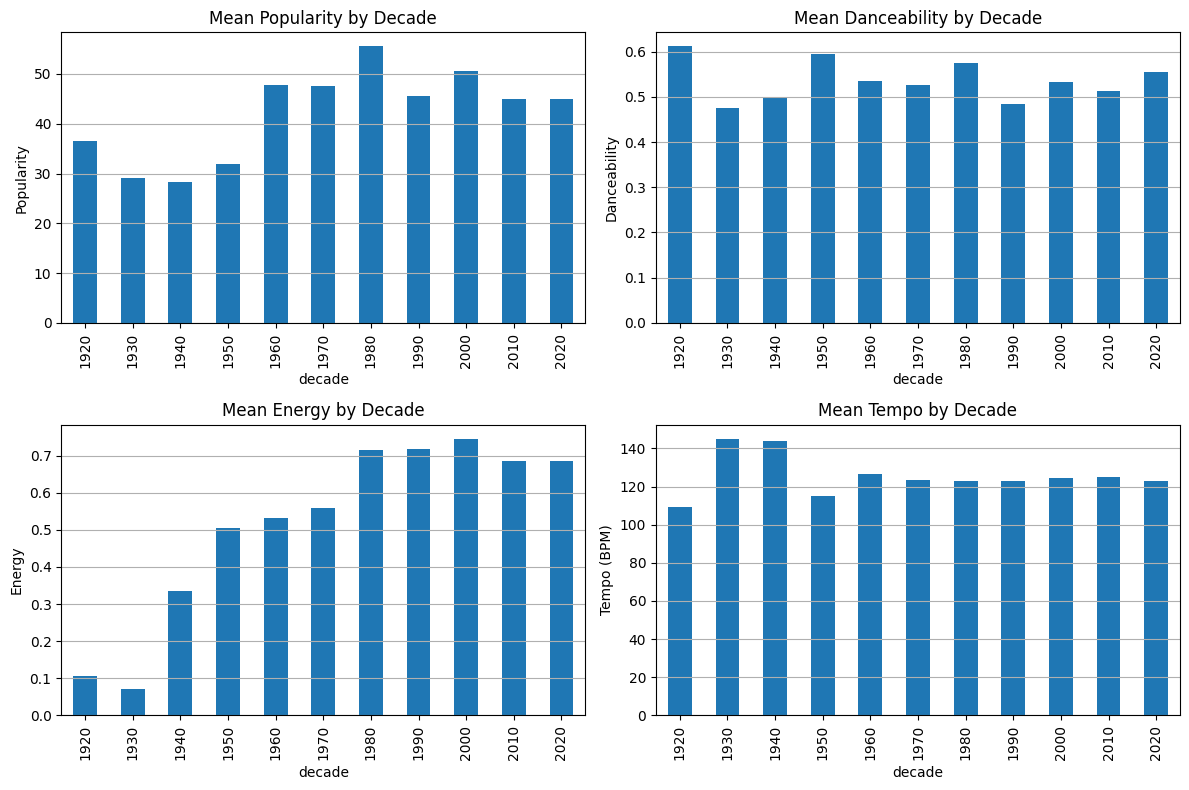

In [73]:
# Visualize selected features by decade
plt.figure(figsize=(12, 8))

# Plot popularity by decade
plt.subplot(2, 2, 1)
decade_means['popularity'].plot(kind='bar')
plt.title('Mean Popularity by Decade')
plt.ylabel('Popularity')
plt.grid(axis='y')

# Plot danceability by decade
plt.subplot(2, 2, 2)
decade_means['danceability'].plot(kind='bar')
plt.title('Mean Danceability by Decade')
plt.ylabel('Danceability')
plt.grid(axis='y')

# Plot energy by decade
plt.subplot(2, 2, 3)
decade_means['energy'].plot(kind='bar')
plt.title('Mean Energy by Decade')
plt.ylabel('Energy')
plt.grid(axis='y')

# Plot tempo by decade
plt.subplot(2, 2, 4)
decade_means['tempo'].plot(kind='bar')
plt.title('Mean Tempo by Decade')
plt.ylabel('Tempo (BPM)')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

## 4. Analysis of Patterns and Temporal Distribution

Analysis of distributions for key audio features


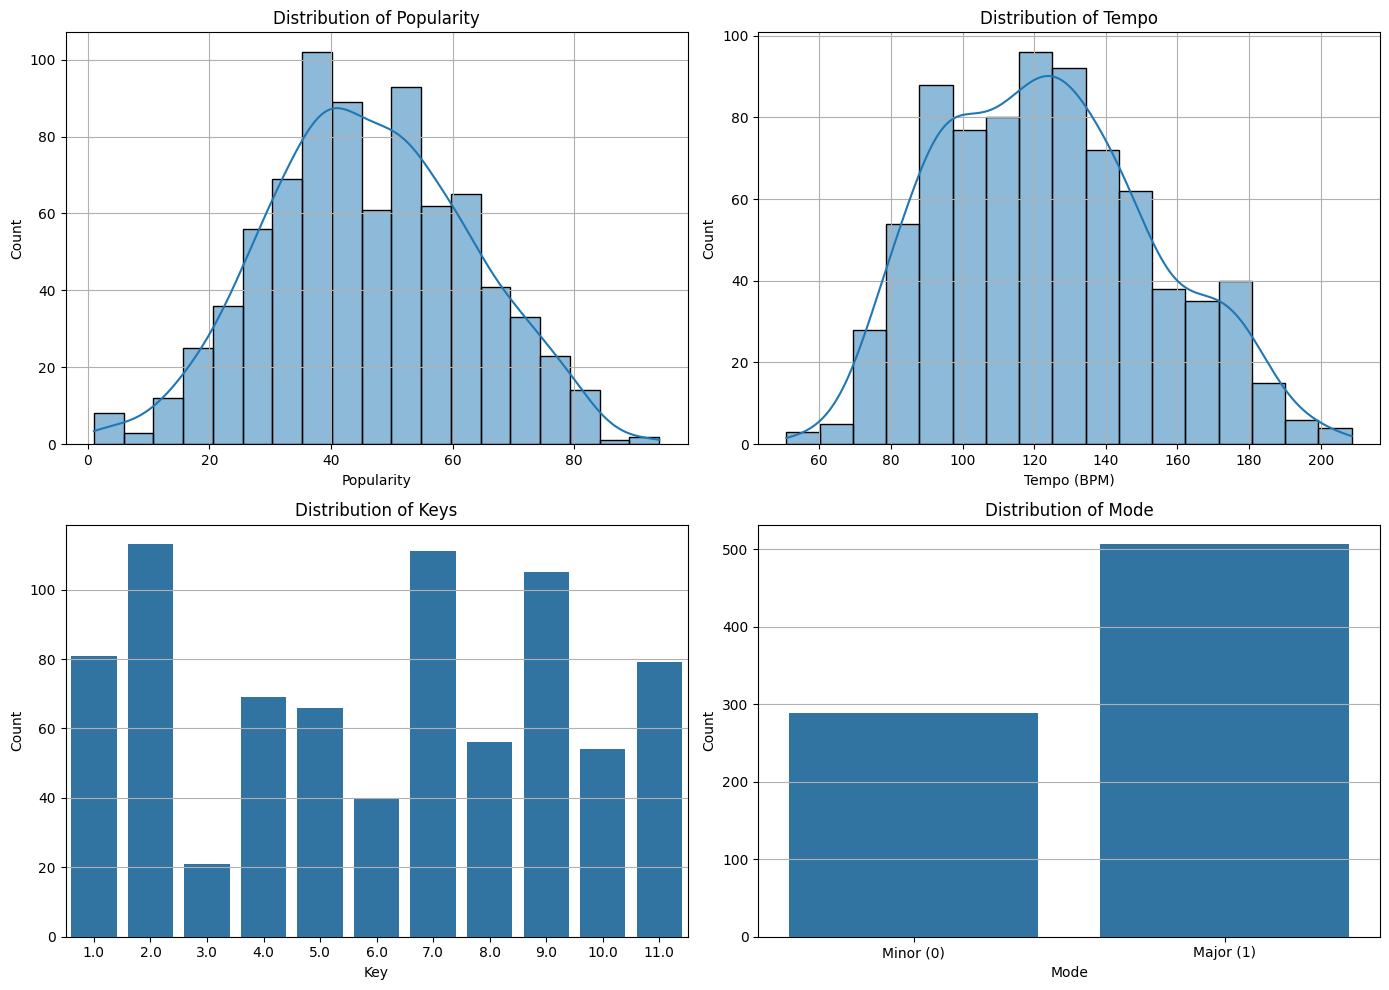

In [74]:
print("Analysis of distributions for key audio features")
# Distribution plots for key features
plt.figure(figsize=(14, 10))

# Popularity distribution
plt.subplot(2, 2, 1)
sns.histplot(df['popularity'], kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.grid()

# Tempo distribution
plt.subplot(2, 2, 2)
sns.histplot(df['tempo'], kde=True)
plt.title('Distribution of Tempo')
plt.xlabel('Tempo (BPM)')
plt.grid()

# Key distribution
plt.subplot(2, 2, 3)
key_counts = df['key'].value_counts().sort_index()
sns.barplot(x=key_counts.index, y=key_counts.values)
plt.title('Distribution of Keys')
plt.xlabel('Key')
plt.ylabel('Count')
plt.grid(axis='y')

# Mode distribution (0=minor, 1=major)
plt.subplot(2, 2, 4)
mode_counts = df['mode'].value_counts().sort_index()
sns.barplot(x=['Minor (0)', 'Major (1)'], y=mode_counts.values)
plt.title('Distribution of Mode')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Correlation analysis between audio features


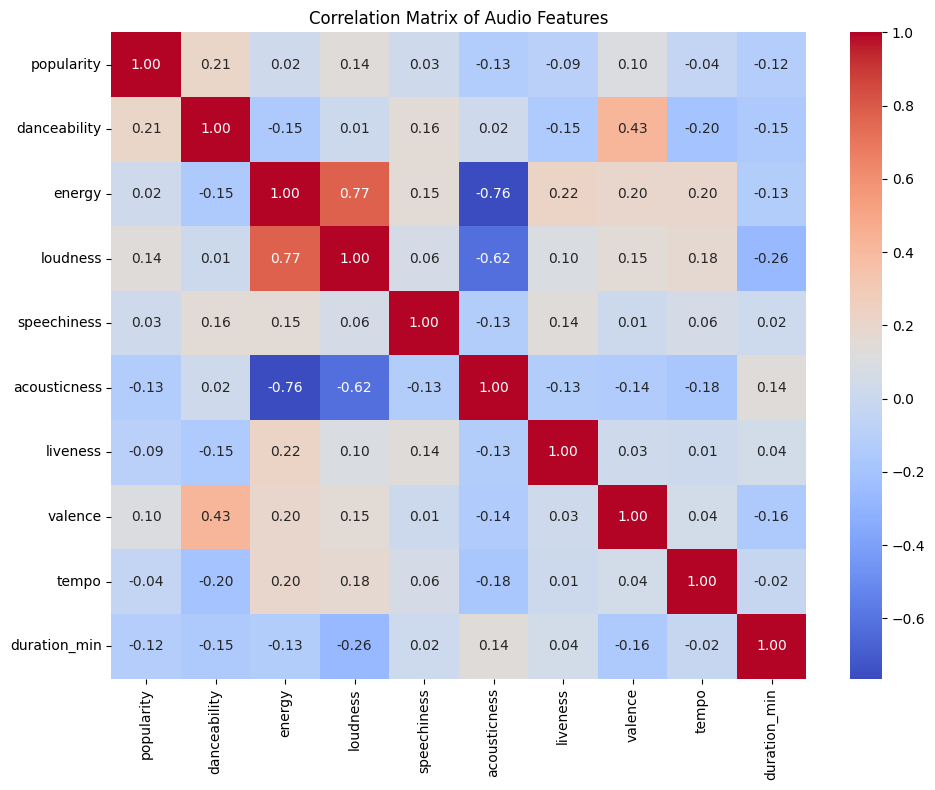

In [75]:
print("Correlation analysis between audio features")
# Calculate correlation matrix
corr_matrix = df[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Audio Features')
plt.tight_layout()
plt.show()

Analyzing temporal trends in audio features


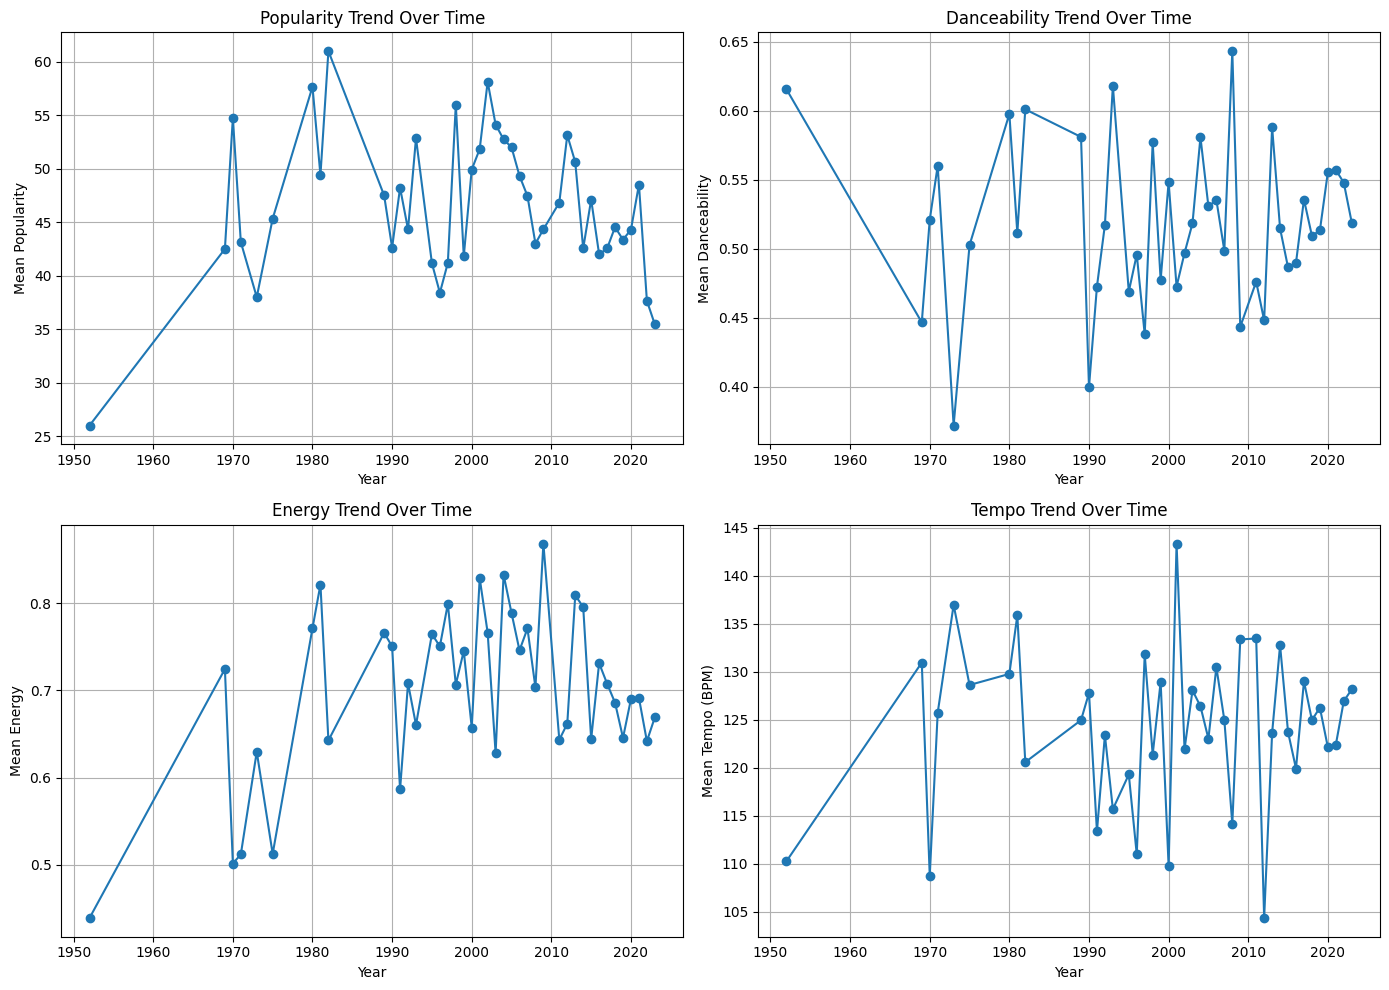

In [76]:
print("Analyzing temporal trends in audio features")
# Group data by year and calculate means
# Filter to years with enough data points (at least 5 songs)
year_counts = df['release_year'].value_counts()
years_with_enough_data = year_counts[year_counts >= 5].index
df_filtered = df[df['release_year'].isin(years_with_enough_data)]

# Group by year and calculate means of key features
yearly_means = df_filtered.groupby('release_year')[['popularity', 'danceability', 'energy', 'tempo']].mean()
yearly_means = yearly_means.sort_index()

# Plot trends over time
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(yearly_means.index, yearly_means['popularity'], 'o-')
plt.title('Popularity Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Popularity')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(yearly_means.index, yearly_means['danceability'], 'o-')
plt.title('Danceability Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Danceability')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(yearly_means.index, yearly_means['energy'], 'o-')
plt.title('Energy Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Energy')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(yearly_means.index, yearly_means['tempo'], 'o-')
plt.title('Tempo Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Tempo (BPM)')
plt.grid()

plt.tight_layout()
plt.show()

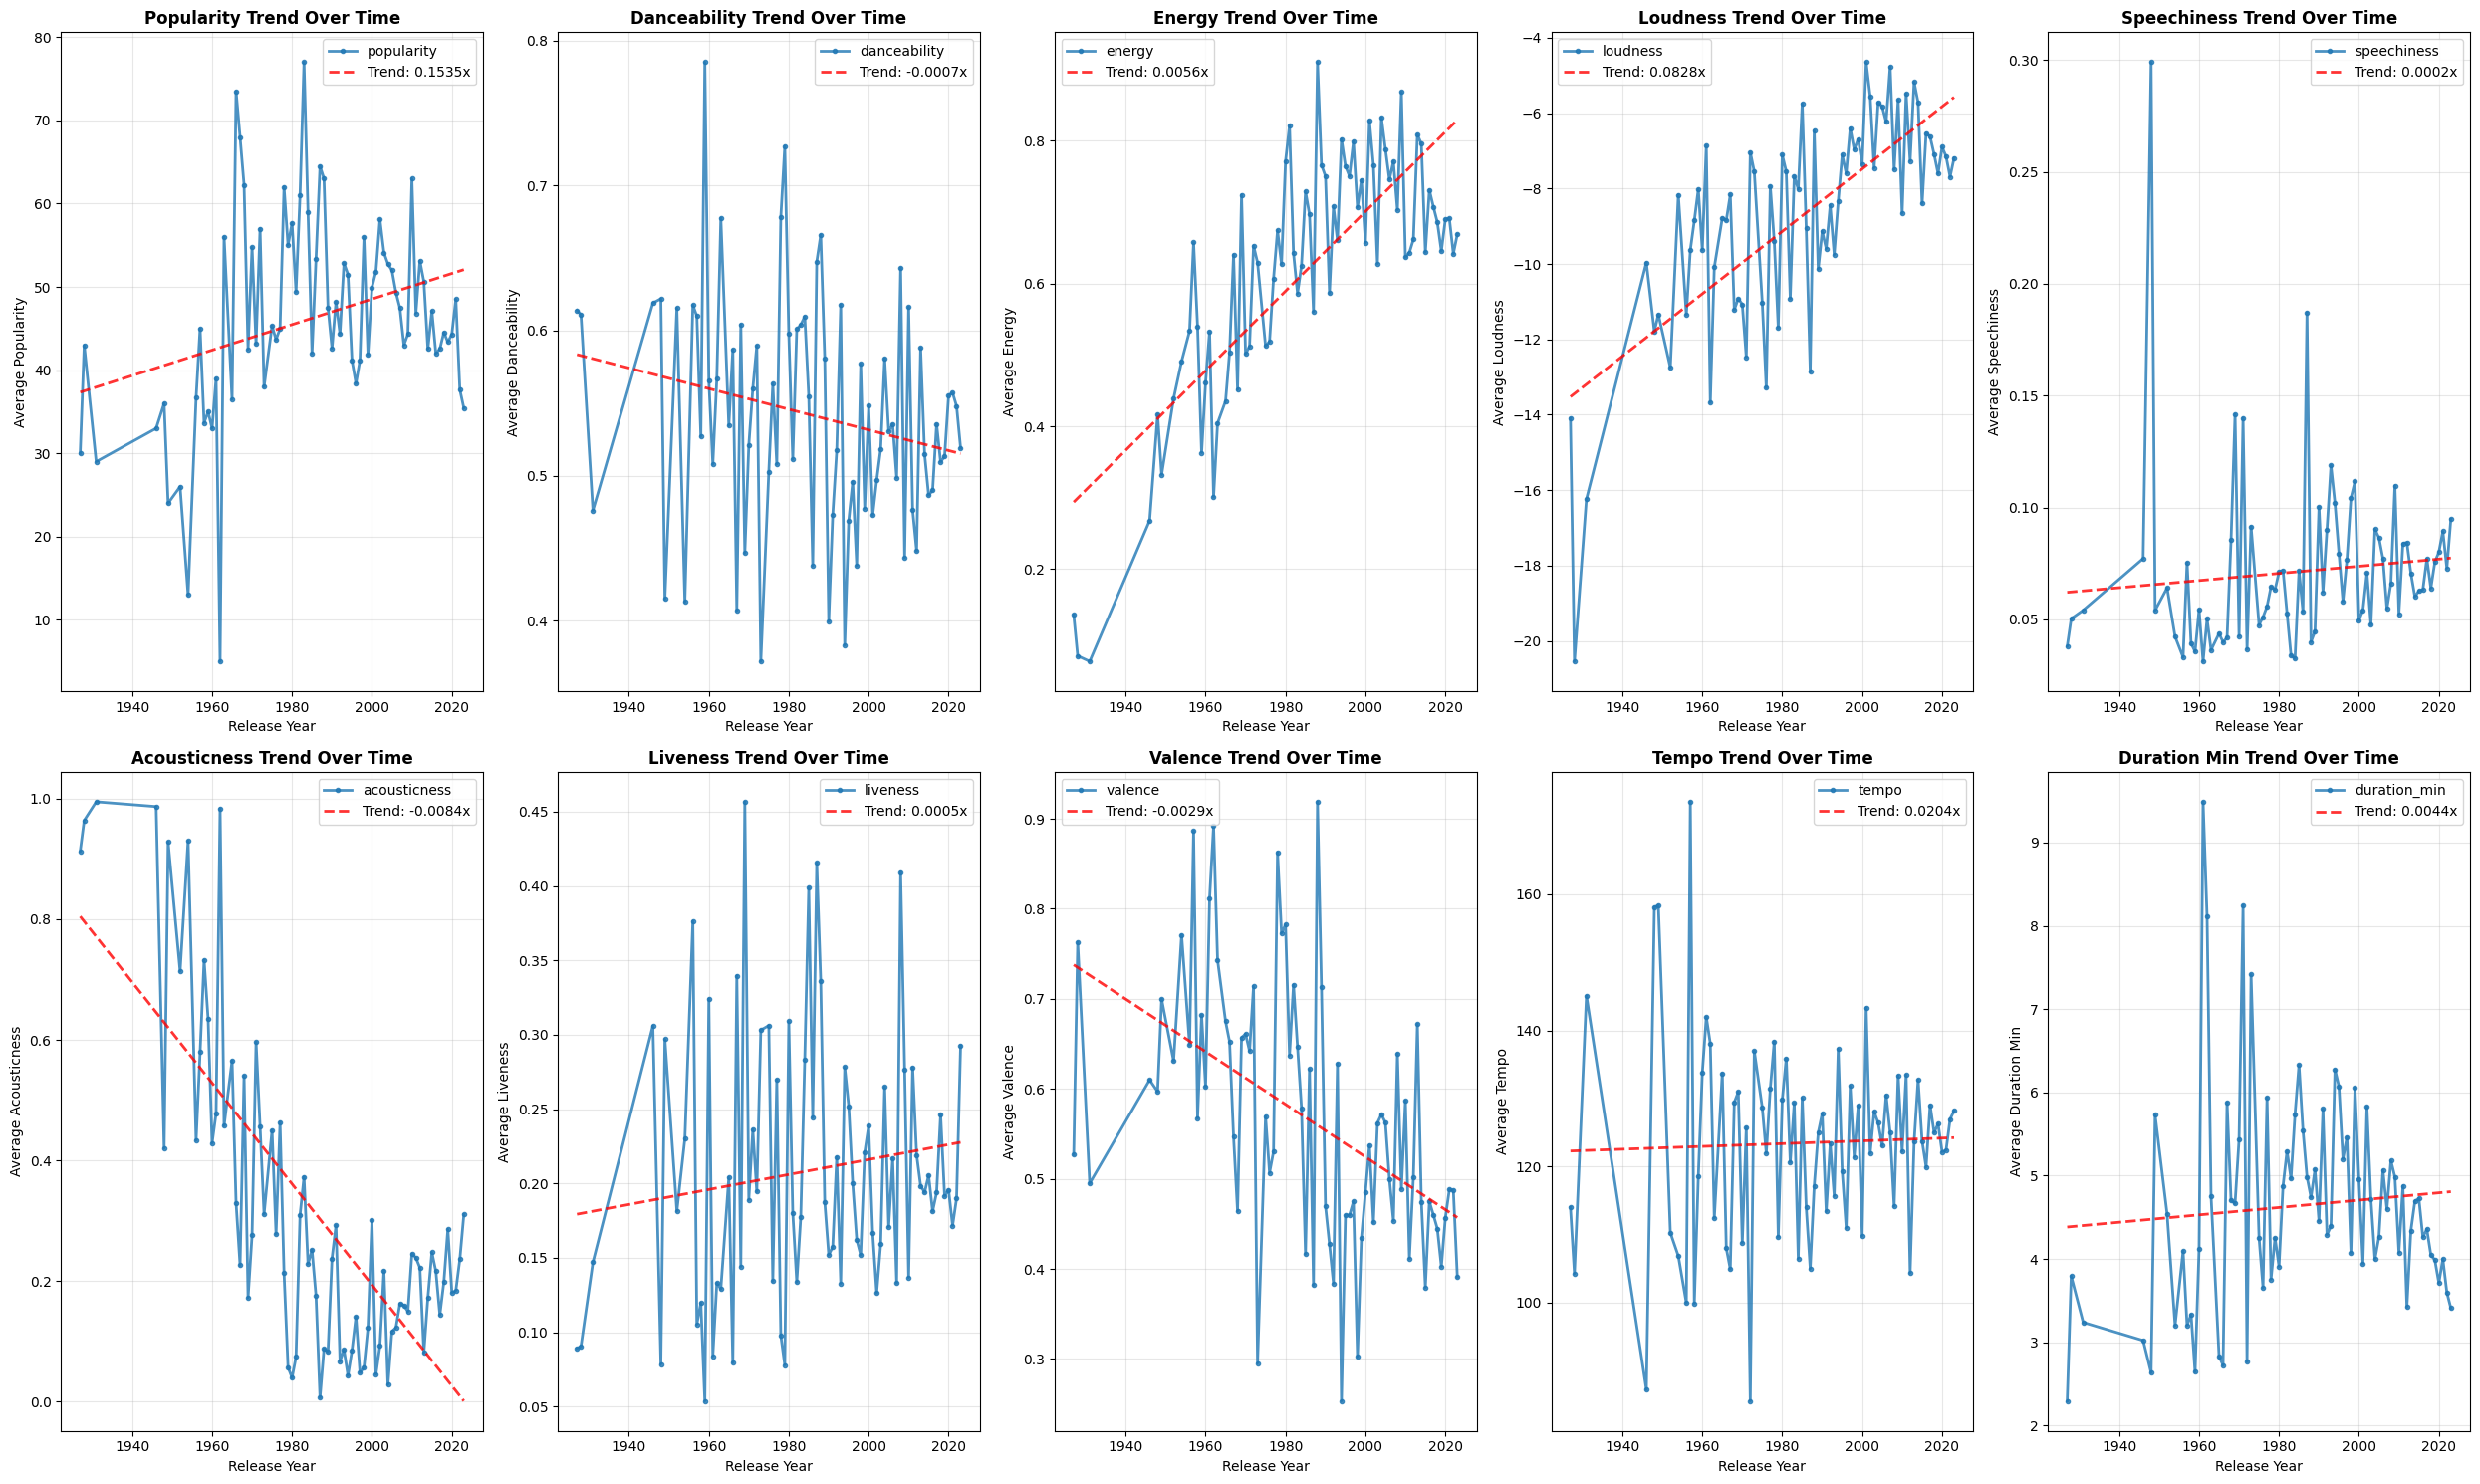

 Temporal Trend Analysis:
popularity:  Increasing (slope: 0.1535, R²: 0.093) **
danceability:  Decreasing (slope: -0.0007, R²: 0.046) 
energy:  Increasing (slope: 0.0056, R²: 0.597) ***
loudness:  Increasing (slope: 0.0828, R²: 0.515) ***
speechiness:  Increasing (slope: 0.0002, R²: 0.010) 
acousticness:  Decreasing (slope: -0.0084, R²: 0.574) ***
liveness:  Increasing (slope: 0.0005, R²: 0.019) 
valence:  Decreasing (slope: -0.0029, R²: 0.239) ***
tempo:  Increasing (slope: 0.0204, R²: 0.001) 
duration_min:  Increasing (slope: 0.0044, R²: 0.007) 


In [77]:
# Analyze temporal trends over years
yearly_trends = df.groupby('release_year')[numerical_features].mean()

# Plot temporal trends
def plot_temporal_trends(yearly_data, features, figsize=(25, 15)):
    """Plot temporal trends for all features"""
    n_features = len(features)
    n_cols = 5
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.ravel() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, feature in enumerate(features):
        if i < len(axes):
            # Plot the trend line
            yearly_data[feature].plot(ax=axes[i], kind='line', marker='o', 
                                    markersize=3, alpha=0.8, linewidth=2)
            
            # Add trend line
            x = yearly_data.index
            y = yearly_data[feature]
            z = np.polyfit(x, y, 1)
            p = np.poly1d(z)
            axes[i].plot(x, p(x), 'r--', alpha=0.8, linewidth=2, label=f'Trend: {z[0]:.4f}x')
            
            axes[i].set_title(f'{feature.replace("_", " ").title()} Trend Over Time', fontweight='bold')
            axes[i].set_xlabel('Release Year')
            axes[i].set_ylabel(f'Average {feature.replace("_", " ").title()}')
            axes[i].grid(True, alpha=0.3)
            axes[i].legend()
    
    # Hide extra subplots
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

plot_temporal_trends(yearly_trends, numerical_features)

# Print trend analysis
print(" Temporal Trend Analysis:")
for feature in numerical_features:
    x = yearly_trends.index
    y = yearly_trends[feature]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    trend_direction = " Increasing" if slope > 0 else " Decreasing" if slope < 0 else " Stable"
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
    
    print(f"{feature}: {trend_direction} (slope: {slope:.4f}, R²: {r_value**2:.3f}) {significance}")

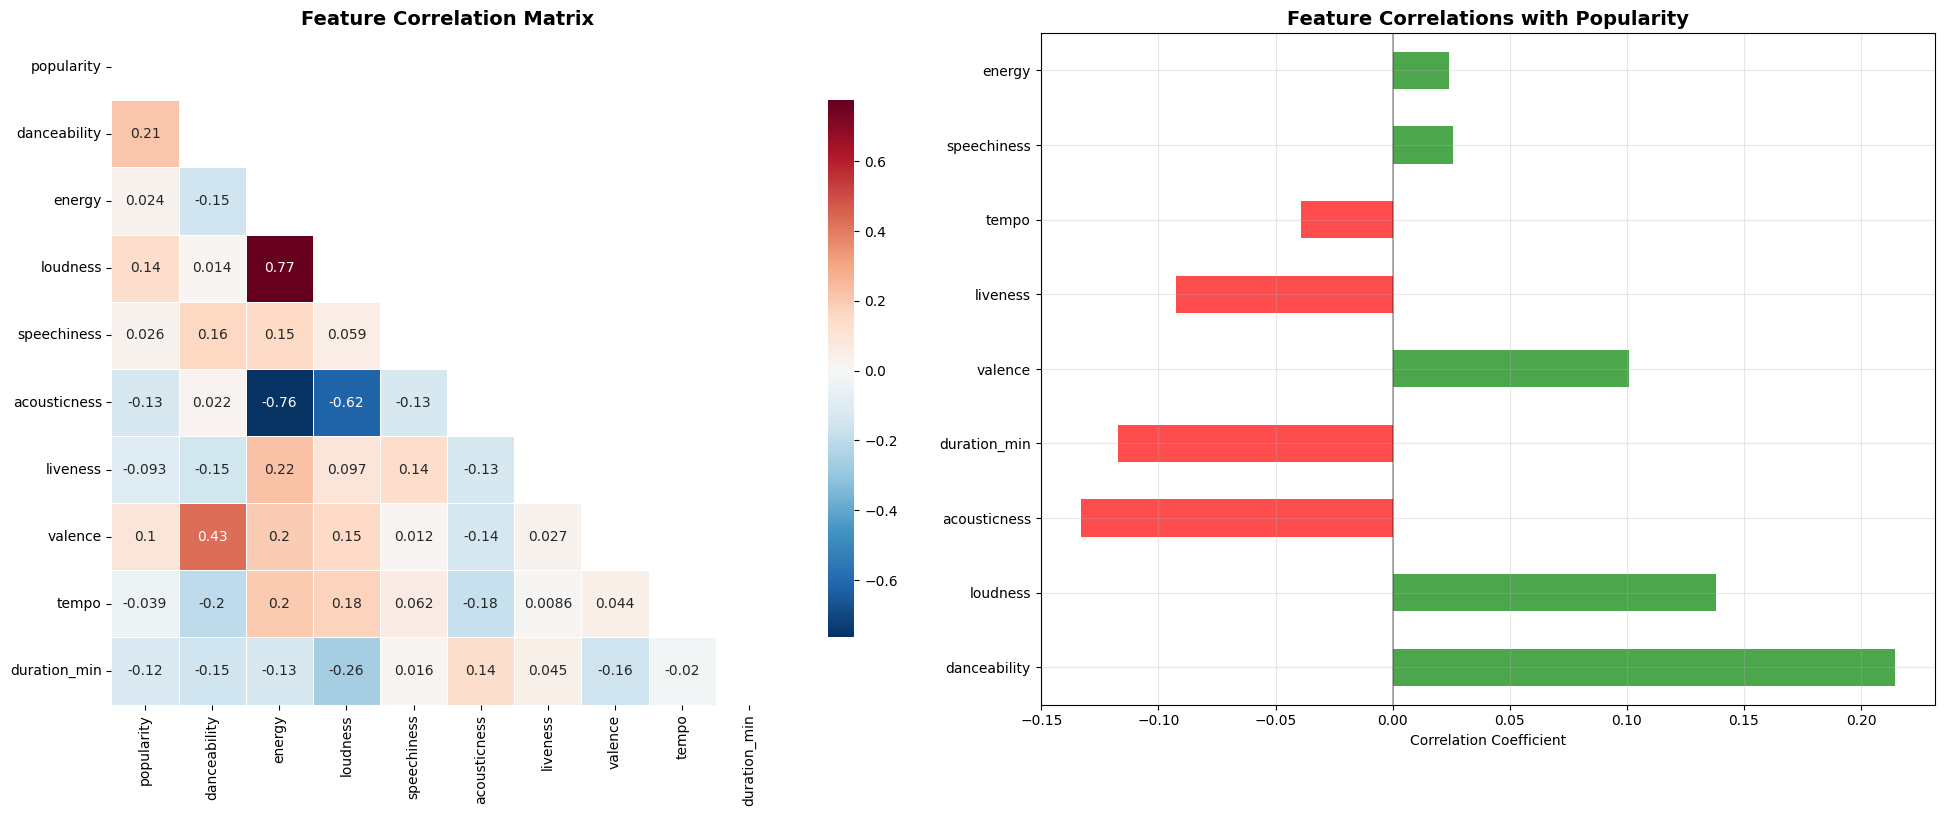

Correlation Analysis Summary:

Strongest positive correlations with popularity:
  danceability: 0.214
  loudness: 0.138
  valence: 0.101

Strongest negative correlations with popularity:
  duration_min: -0.117
  liveness: -0.093
  tempo: -0.039

Strongest feature-to-feature correlations:
  energy ↔ loudness: 0.774
  loudness ↔ energy: 0.774
  energy ↔ acousticness: -0.764
  acousticness ↔ energy: -0.764
  acousticness ↔ loudness: -0.624


In [78]:
# Comprehensive correlation analysis
def plot_correlation_analysis(df, features):
    """Create comprehensive correlation visualizations"""
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Correlation heatmap
    correlation_matrix = df[features].corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
    
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": .8}, ax=axes[0])
    axes[0].set_title('Feature Correlation Matrix', fontweight='bold', fontsize=14)
    
    # Correlation with popularity
    pop_correlations = correlation_matrix['popularity'].drop('popularity').sort_values(key=abs, ascending=False)
    colors = ['red' if x < 0 else 'green' for x in pop_correlations.values]
    pop_correlations.plot(kind='barh', ax=axes[1], color=colors, alpha=0.7)
    axes[1].set_title('Feature Correlations with Popularity', fontweight='bold', fontsize=14)
    axes[1].set_xlabel('Correlation Coefficient')
    axes[1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix, pop_correlations

correlation_matrix, pop_correlations = plot_correlation_analysis(df, numerical_features)

print("Correlation Analysis Summary:")
print("\nStrongest positive correlations with popularity:")
positive_corr = pop_correlations[pop_correlations > 0].head(3)
for feature, corr in positive_corr.items():
    print(f"  {feature}: {corr:.3f}")

print("\nStrongest negative correlations with popularity:")
negative_corr = pop_correlations[pop_correlations < 0].tail(3)
for feature, corr in negative_corr.items():
    print(f"  {feature}: {corr:.3f}")

# Find strongest overall correlations (excluding popularity)
corr_abs = correlation_matrix.abs()
np.fill_diagonal(corr_abs.values, 0)  # Remove diagonal
strongest_corr = corr_abs.unstack().sort_values(ascending=False).head(5)
print("\nStrongest feature-to-feature correlations:")
for (feat1, feat2), corr in strongest_corr.items():
    if feat1 != feat2:
        print(f"  {feat1} ↔ {feat2}: {correlation_matrix.loc[feat1, feat2]:.3f}")

## 5. Outlier Detection

In [79]:
print("Detecting outliers using IQR method")
# Function to detect outliers using IQR method
def find_outliers_iqr(df, column):
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Detect outliers for key features
for feature in ['tempo', 'popularity', 'energy', 'duration_min']:
    outliers, lower, upper = find_outliers_iqr(df, feature)
    print(f"\nOutliers in {feature}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
    
    if len(outliers) > 0:
        print("Sample outliers:")
        print(outliers[['Artist Name', 'Track Name', feature, 'release_year']].head(3))

Detecting outliers using IQR method

Outliers in tempo:
Number of outliers: 0
Lower bound: 33.71, Upper bound: 210.00

Outliers in popularity:
Number of outliers: 1
Lower bound: 0.50, Upper bound: 92.50
Sample outliers:
   Artist Name       Track Name  popularity  release_year
78  The Weeknd  Blinding Lights        94.0          2019

Outliers in energy:
Number of outliers: 1
Lower bound: 0.03, Upper bound: 1.38
Sample outliers:
                                          Artist Name            Track Name  \
81  Julian Dash, Jay McShann, Eugene Ramey, Gus Jo...  Blue and Sentimental   

    energy  release_year  
81  0.0291          1952  

Outliers in duration_min:
Number of outliers: 50
Lower bound: 0.74, Upper bound: 7.41
Sample outliers:
    Artist Name  Track Name  duration_min  release_year
55       Prince    Batdance     10.381472          1989
66   Joel Veena        Bhim      7.727278          2021
74  Death Hawks  Black Acid      9.110667          2015


Visualizing outliers with box plots


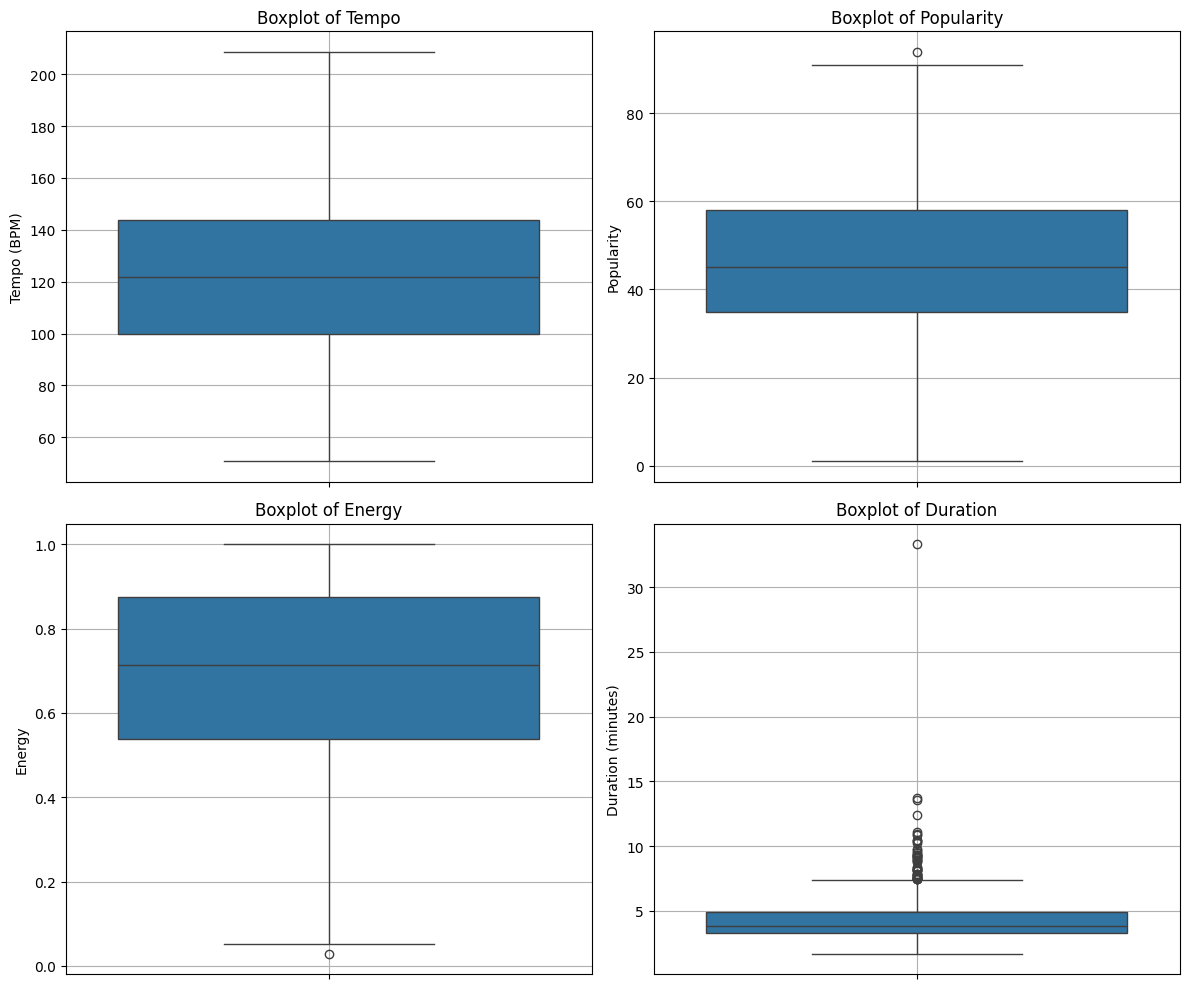

In [80]:
print("Visualizing outliers with box plots")
# Create boxplots to visualize outliers
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y=df['tempo'])
plt.title('Boxplot of Tempo')
plt.ylabel('Tempo (BPM)')
plt.grid()

plt.subplot(2, 2, 2)
sns.boxplot(y=df['popularity'])
plt.title('Boxplot of Popularity')
plt.ylabel('Popularity')
plt.grid()

plt.subplot(2, 2, 3)
sns.boxplot(y=df['energy'])
plt.title('Boxplot of Energy')
plt.ylabel('Energy')
plt.grid()

plt.subplot(2, 2, 4)
sns.boxplot(y=df['duration_min'])
plt.title('Boxplot of Duration')
plt.ylabel('Duration (minutes)')
plt.grid()

plt.tight_layout()
plt.show()

## 6. Clustering Analysis

K-Means Clustering Analysis


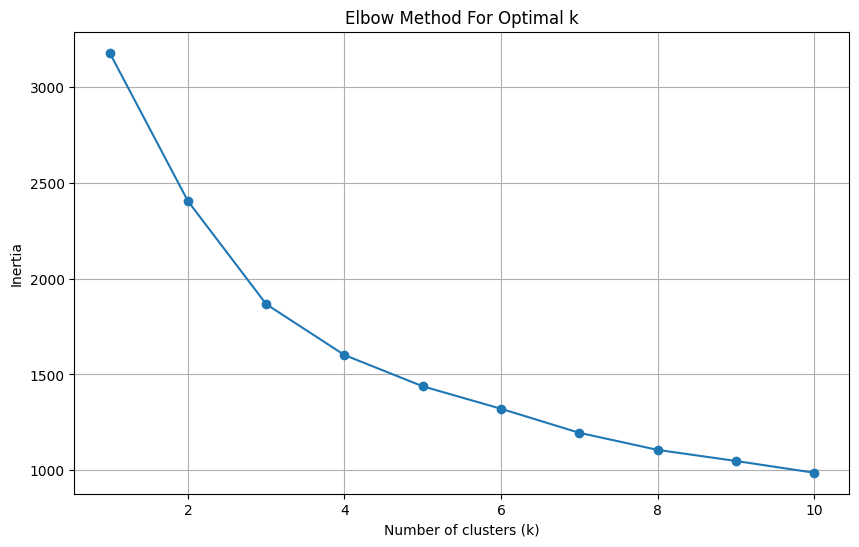

In [81]:
print("K-Means Clustering Analysis")
# Select features for clustering
features_for_clustering = ['danceability', 'energy', 'valence', 'tempo']
X_cluster = df[features_for_clustering]

# Standardize data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Determine optimal number of clusters using the elbow method
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'o-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [82]:
from sklearn.metrics import silhouette_score

def analyze_optimal_clusters(data, max_k=15):
    """Comprehensive analysis to determine optimal number of clusters"""
    
    # Elbow method (Within-cluster sum of squares)
    inertias = []
    silhouette_scores = []
    k_range = range(1, max_k + 1)
    
    print("Analyzing optimal number of clusters...")
    
    for k in k_range:
        if k == 1:
            inertias.append(((data - data.mean(axis=0))**2).sum())
        else:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(data)
            inertias.append(kmeans.inertia_)
            
            # Calculate silhouette score for k > 1
            if k > 1:
                silhouette_avg = silhouette_score(data, kmeans.labels_)
                silhouette_scores.append(silhouette_avg)
    
    # Plot analysis
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Elbow plot
    axes[0].plot(k_range, inertias, marker='o', linewidth=2, markersize=8)
    axes[0].set_xlabel('Number of Clusters (k)')
    axes[0].set_ylabel('Within-cluster Sum of Squares (WCSS)')
    axes[0].set_title('Elbow Method for Optimal k', fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    
    # Calculate elbow point
    differences = np.diff(inertias)
    second_differences = np.diff(differences)
    elbow_point = np.argmax(second_differences) + 2  # +2 because of double differencing
    axes[0].axvline(x=elbow_point, color='red', linestyle='--', alpha=0.7, 
                   label=f'Elbow at k={elbow_point}')
    axes[0].legend()
    
    # Silhouette plot
    k_range_sil = range(2, max_k + 1)
    
    if len(silhouette_scores) > 0:
        axes[1].plot(k_range_sil, silhouette_scores, marker='o', linewidth=2, markersize=8, color='green')
        
        
        optimal_k_silhouette = k_range_sil[np.argmax(silhouette_scores)]
        best_silhouette = max(silhouette_scores)
        
        axes[1].axvline(x=optimal_k_silhouette, color='red', linestyle='--', alpha=0.7,
                      label=f'Best k={optimal_k_silhouette} (score: {best_silhouette:.3f})')
        axes[1].legend()
    else:
        optimal_k_silhouette = 2  # Default if no silhouette scores available
        best_silhouette = 0
    
    axes[1].set_xlabel('Number of Clusters (k)')
    axes[1].set_ylabel('Average Silhouette Score')
    axes[1].set_title('Silhouette Analysis for Optimal k', fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    # Gap statistic (simplified version)
    gap_stats = []
    for k in range(1, min(10, max_k + 1)):  # Limit for computational efficiency
        if k == 1:
            gap_stats.append(0)
        else:
            # Real data clustering
            kmeans_real = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans_real.fit(data)
            real_inertia = kmeans_real.inertia_
            
            # Random data clustering (simplified)
            random_data = np.random.uniform(data.min(), data.max(), data.shape)
            kmeans_random = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans_random.fit(random_data)
            random_inertia = kmeans_random.inertia_
            
            gap = np.log(random_inertia) - np.log(real_inertia)
            gap_stats.append(gap)
    
    gap_k_range = range(1, len(gap_stats) + 1)
    axes[2].plot(gap_k_range, gap_stats, marker='o', linewidth=2, markersize=8, color='purple')
    axes[2].set_xlabel('Number of Clusters (k)')
    axes[2].set_ylabel('Gap Statistic')
    axes[2].set_title('Gap Statistic for Optimal k', fontweight='bold')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'elbow_k': elbow_point,
        'silhouette_k': optimal_k_silhouette,
        'silhouette_scores': silhouette_scores,
        'inertias': inertias,
        'best_silhouette': best_silhouette if len(silhouette_scores) > 0 else None
    }

Analyzing optimal number of clusters...


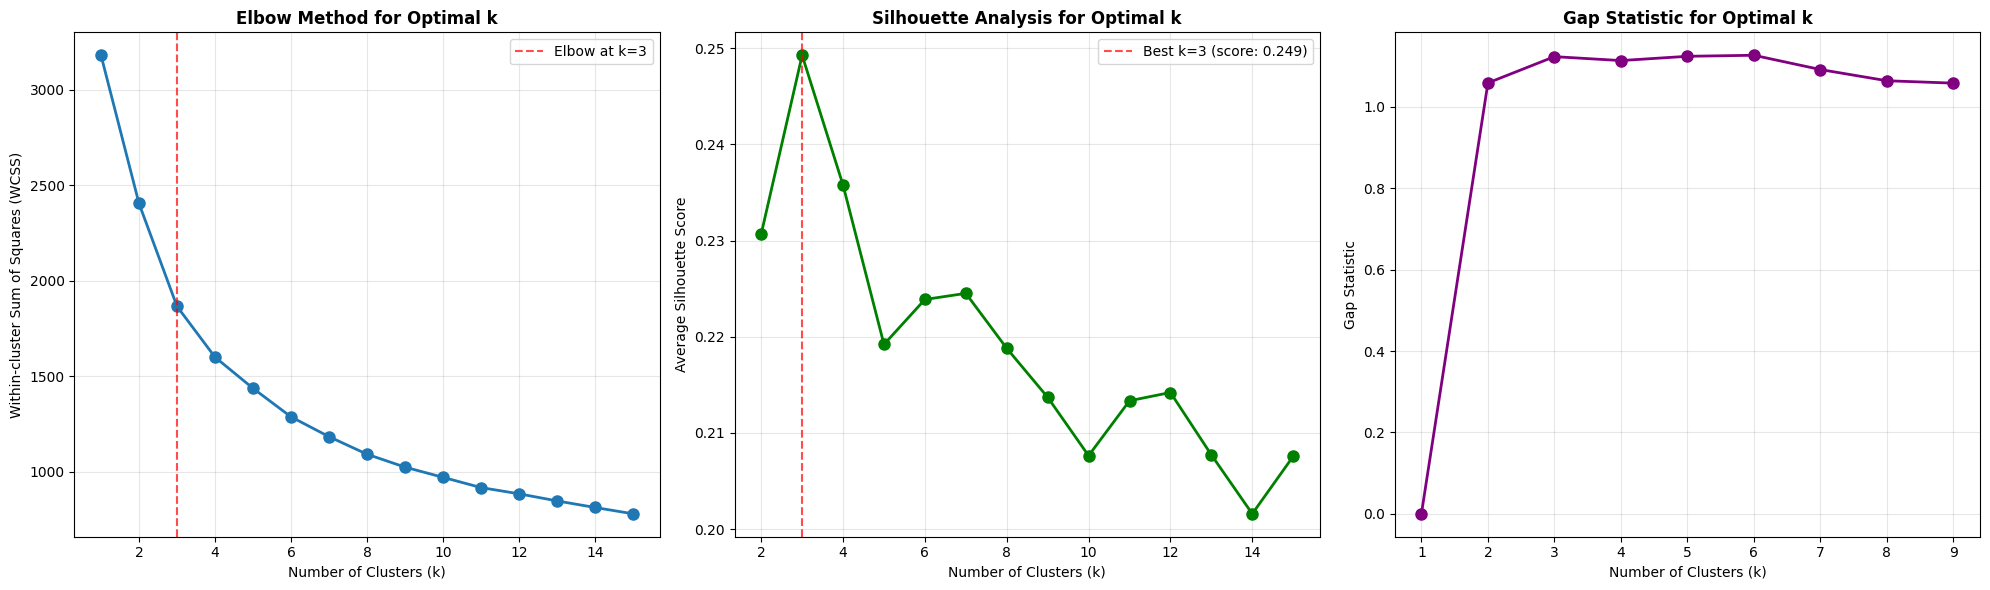


 Optimal Cluster Analysis Results:
Elbow method suggests: k = 3
Silhouette analysis suggests: k = 3
Best silhouette score: 0.249

 Selected optimal k = 3 for further analysis


In [83]:
optimal_analysis = analyze_optimal_clusters(scaler.transform(X_cluster), max_k=15)

print(f"\n Optimal Cluster Analysis Results:")
print(f"Elbow method suggests: k = {optimal_analysis['elbow_k']}")
print(f"Silhouette analysis suggests: k = {optimal_analysis['silhouette_k']}")

if optimal_analysis['best_silhouette'] is not None:
    print(f"Best silhouette score: {optimal_analysis['best_silhouette']:.3f}")
else:
    print("Silhouette score not available (requires at least 2 clusters)")

# Choose optimal k (prefer silhouette analysis)
optimal_k = optimal_analysis['silhouette_k']
print(f"\n Selected optimal k = {optimal_k} for further analysis")

In [84]:
print("Applying K-Means with k=4 clusters")
# Apply K-Means clustering with k=4
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Get cluster statistics
print("\nCluster Statistics:")
cluster_stats = df.groupby('cluster')[features_for_clustering + ['popularity']].mean().round(3)
print(cluster_stats)

Applying K-Means with k=4 clusters

Cluster Statistics:
         danceability  energy  valence    tempo  popularity
cluster                                                    
0               0.448   0.828    0.362  109.972      44.420
1               0.686   0.684    0.699  115.492      49.655
2               0.521   0.360    0.297  111.479      44.784
3               0.424   0.811    0.525  162.015      44.011


Visualizing clusters with PCA


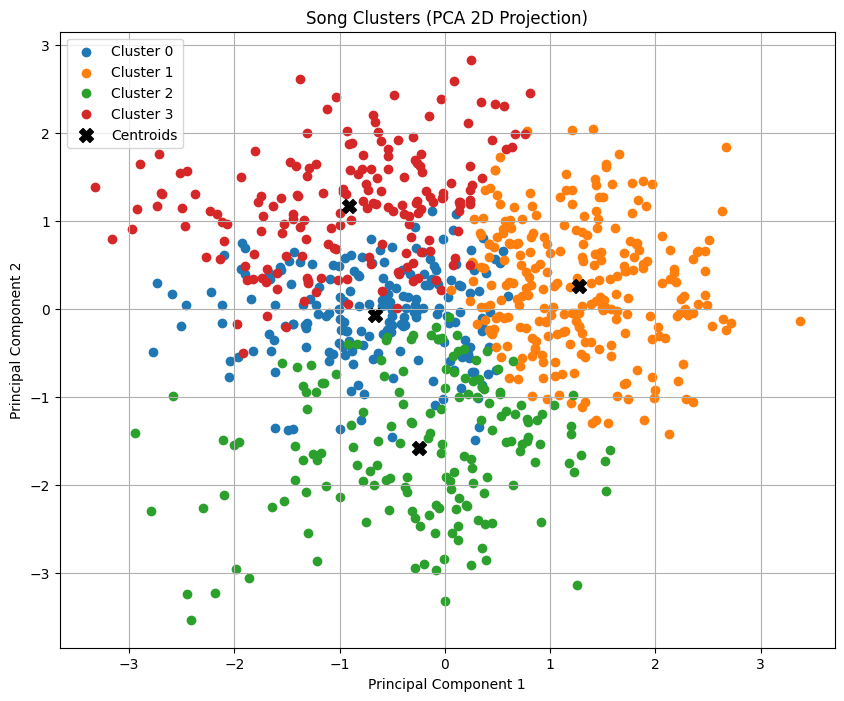

In [85]:
print("Visualizing clusters with PCA")
# Use PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to DataFrame
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# Plot clusters in 2D space
plt.figure(figsize=(10, 8))
for i in range(k):
    plt.scatter(df[df['cluster'] == i]['pca1'], 
                df[df['cluster'] == i]['pca2'], 
                label=f'Cluster {i}')

# Plot cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=100, c='black', marker='X', label='Centroids')

plt.title('Song Clusters (PCA 2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [86]:
print("Cluster Descriptions:")
# Describe and label clusters
for i in range(k):
    cluster_data = df[df['cluster'] == i]
    
    # Get mean values for key metrics
    tempo_mean = cluster_data['tempo'].mean()
    popularity_mean = cluster_data['popularity'].mean()
    energy_mean = cluster_data['energy'].mean()
    dance_mean = cluster_data['danceability'].mean()
    
    # Create descriptive labels
    tempo_desc = "Fast" if tempo_mean > 120 else "Slow"
    popular_desc = "Popular" if popularity_mean > df['popularity'].mean() else "Less Popular"
    energy_desc = "High Energy" if energy_mean > 0.65 else "Low Energy"
    dance_desc = "Danceable" if dance_mean > 0.55 else "Less Danceable"
    
    print(f"\nCluster {i}: {tempo_desc} {energy_desc} {dance_desc} Songs ({popular_desc})")
    print(f"Average tempo: {tempo_mean:.2f} BPM")
    print(f"Average popularity: {popularity_mean:.2f}")
    print(f"Number of songs: {len(cluster_data)}")
    print("Sample songs:")
    print(cluster_data[['Artist Name', 'Track Name', 'popularity', 'release_year']].sample(3))

Cluster Descriptions:

Cluster 0: Slow High Energy Less Danceable Songs (Less Popular)
Average tempo: 109.97 BPM
Average popularity: 44.42
Number of songs: 193
Sample songs:
        Artist Name              Track Name  popularity  release_year
780  Black Mountain                   Wucan        44.0          2008
639   Guns N' Roses  Sympathy For The Devil        54.0          1994
10           Mitski                 A Pearl        69.0          2019

Cluster 1: Slow High Energy Danceable Songs (Popular)
Average tempo: 115.49 BPM
Average popularity: 49.66
Number of songs: 258
Sample songs:
        Artist Name                         Track Name  popularity  \
633        Duckwrth                       Super Bounce        64.0   
265  Yehudit Ravitz  Hakol Beseder - Omri Smadar Remix        35.0   
113            TTNG                      Cat Fantastic        41.0   

     release_year  
633          2021  
265          2020  
113          2020  

Cluster 2: Slow Low Energy Less Danceable 

Hierarchical Clustering Analysis


<Figure size 1200x800 with 0 Axes>

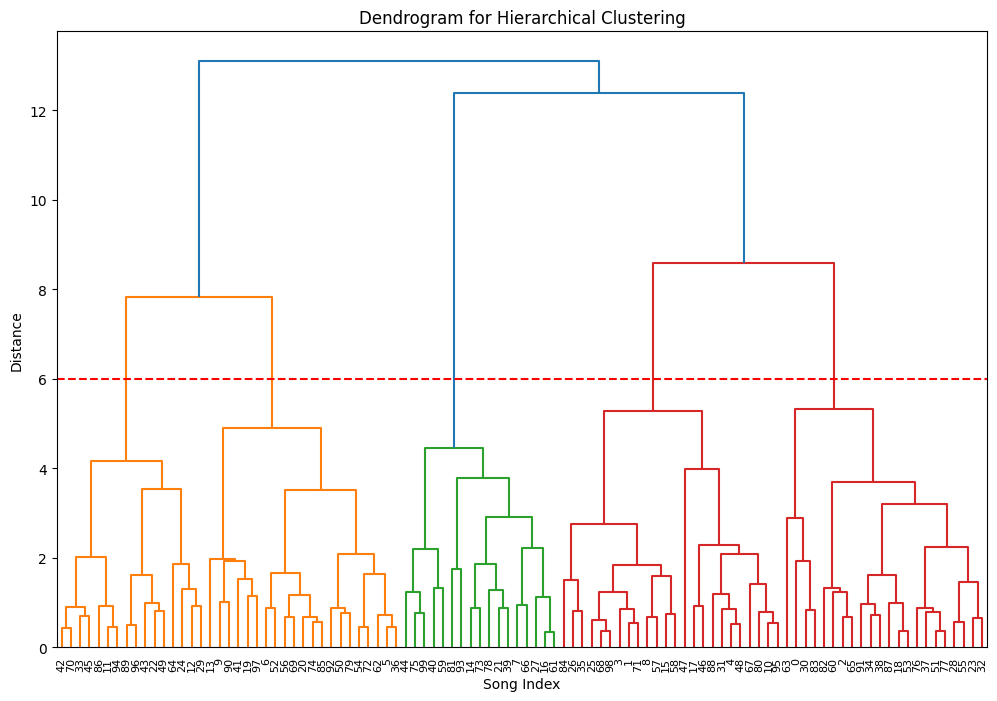

In [87]:
print("Hierarchical Clustering Analysis")
# For simplicity, use a sample of 100 songs
sample_size = 100
df_sample = df.sample(sample_size, random_state=42)

# Get features for hierarchical clustering
X_sample = df_sample[features_for_clustering].values
X_sample_scaled = scaler.transform(X_sample)

# Perform hierarchical clustering
# Calculate the linkage matrix
Z = AgglomerativeClustering(n_clusters=4, linkage='ward')
df_sample['hierarchical_cluster'] = Z.fit_predict(X_sample_scaled)

# Plot dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(12, 8))
linked = linkage(X_sample_scaled, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Song Index')
plt.ylabel('Distance')
plt.axhline(y=6, color='r', linestyle='--')  # Cut-off line for 4 clusters
plt.show()

Comparison of K-Means and Hierarchical Clustering


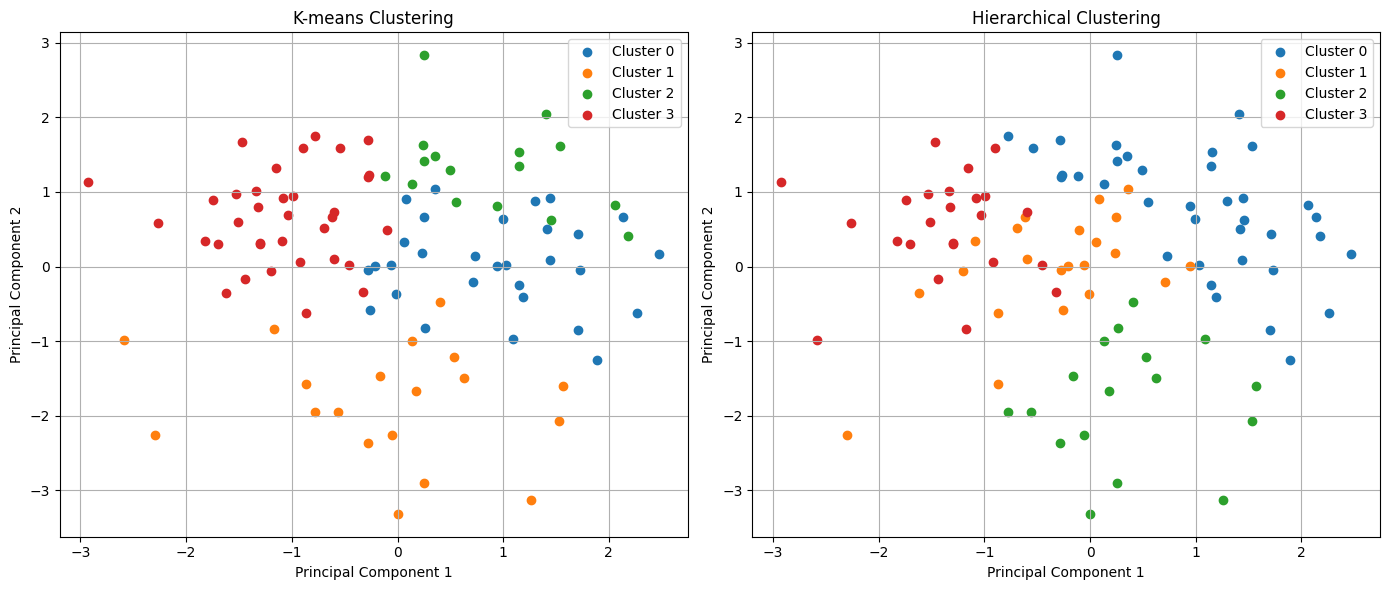

In [88]:
print("Comparison of K-Means and Hierarchical Clustering")
# Compare clusters from both methods
# Find K-means clusters for the same sample
kmeans_sample = KMeans(n_clusters=4, random_state=42)
df_sample['kmeans_cluster'] = kmeans_sample.fit_predict(X_sample_scaled)

# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# K-means clusters
for i in range(4):
    cluster_points = df_sample[df_sample['kmeans_cluster'] == i]
    ax1.scatter(cluster_points['pca1'], cluster_points['pca2'], label=f'Cluster {i}')

ax1.set_title('K-means Clustering')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.legend()
ax1.grid()

# Hierarchical clusters
for i in range(4):
    cluster_points = df_sample[df_sample['hierarchical_cluster'] == i]
    ax2.scatter(cluster_points['pca1'], cluster_points['pca2'], label=f'Cluster {i}')

ax2.set_title('Hierarchical Clustering')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

## 7. Classification for Popularity Prediction

In [89]:
print("Creating binary target variable for classification")
# Create a binary target variable
# Songs with popularity > median are considered 'popular'
popularity_median = df['popularity'].median()
df['is_popular'] = (df['popularity'] > popularity_median).astype(int)

print(f"Median popularity: {popularity_median}")
print(f"Class distribution: {df['is_popular'].value_counts().to_dict()}")

Creating binary target variable for classification
Median popularity: 45.0
Class distribution: {0: 400, 1: 395}


In [90]:
print("Preparing features and target for classification")
# Select features for classification
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'liveness', 'valence', 'tempo']

X = df[features]
y = df['is_popular']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Preparing features and target for classification
Training set shape: (556, 8)
Testing set shape: (239, 8)


In [91]:
print("Training different classification models")
# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB()
}

# Dictionary to store results
results = {}

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Determine best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with accuracy {results[best_model]:.4f}")

Training different classification models

Decision Tree Results:
Accuracy: 0.5941

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.51      0.54       109
           1       0.62      0.66      0.64       130

    accuracy                           0.59       239
   macro avg       0.59      0.59      0.59       239
weighted avg       0.59      0.59      0.59       239


Random Forest Results:
Accuracy: 0.5774

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.61      0.57       109
           1       0.63      0.55      0.59       130

    accuracy                           0.58       239
   macro avg       0.58      0.58      0.58       239
weighted avg       0.58      0.58      0.58       239


Naive Bayes Results:
Accuracy: 0.5900

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.58      0.56       109
   

Feature Importance Analysis

Feature ranking:
1. danceability (0.2623)
2. valence (0.1871)
3. energy (0.1692)
4. acousticness (0.1544)
5. loudness (0.1215)
6. tempo (0.0641)
7. liveness (0.0213)
8. speechiness (0.0200)


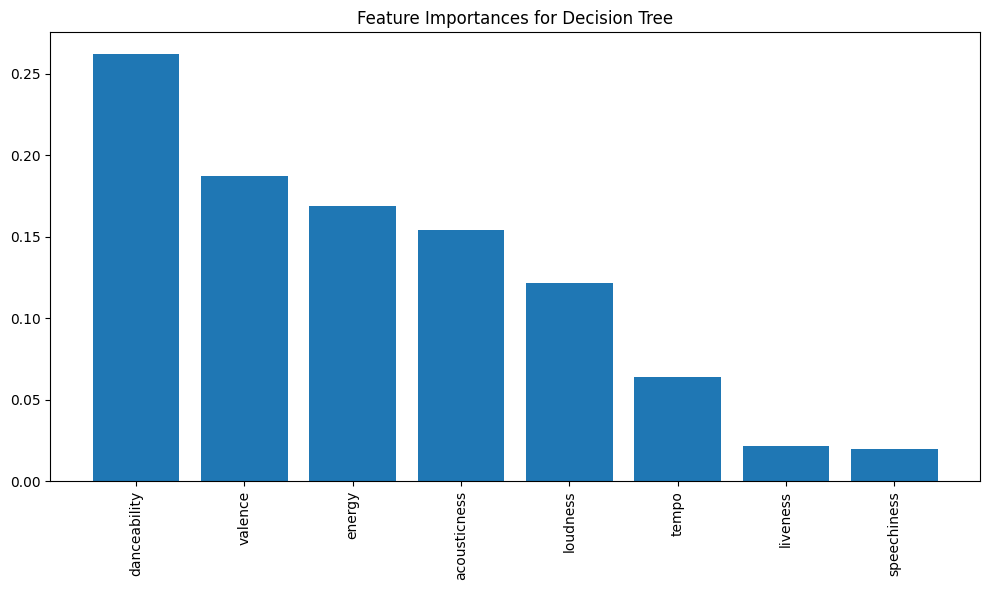

In [92]:
print("Feature Importance Analysis")
# Analyze feature importances for Random Forest
if best_model in ["Decision Tree", "Random Forest"]:
    best_classifier = models[best_model]
    
    # Get feature importances
    importances = best_classifier.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    print("\nFeature ranking:")
    for i in range(X.shape[1]):
        print(f"{i+1}. {features[indices[i]]} ({importances[indices[i]]:.4f})")
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances for {best_model}")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()